In [9]:
import numpy as np
import scipy.linalg as la
#from numpy import linalg as LA
import math
import cmath
import matplotlib.pyplot as plt
from matplotlib import cm 


def spinZi (L, new, node):
    M = len(new)
    #print("M: ", M)
    S = np.zeros((M,M))
    for i in range(M):
        basis = [decToBin(k,L) for k in range(2**L)]
        s1 = int(basis[new[i]][node])-0.5
        S[i,i] = S[i,i] + s1 #diagonal part, H_p
            
    return S

def spins (psi, L,  new):
    sp =[]
    for i in range(L):
        S = spinZi (L, new, i)
        sp.append(round(np.real(np.dot(np.conj(psi), np.dot(S, np.transpose(psi)))), 4))
    return sp

def sZi (L, J, delta, P, new, psi):
    M = len(new)
    #print("M: ", M)
    S = np.zeros(L)
    for i in range(M):
        basis = [decToBin(k,L) for k in range(2**L)]
        for j in range(L):
            s1 = (int(basis[new[i]][j])-0.5)*psi[i]
            #s1 = (int(basis[i][j])-0.5)*psi[i]
            S[j] = S[j] + s1
    


    return S

def stateEnergy (psi, H, L):
    return np.real(np.dot(np.conj(psi), np.dot(H, np.transpose(psi))))/L    
    
def cv(T, eigenVal):
    Z = sum([math.exp(-e/T) for e in eigenVal])
    E = sum([e*math.exp(-e/T) for e in eigenVal])/Z
    E2 = sum([e*e*math.exp(-e/T) for e in eigenVal])/Z
    cv = (E2- E*E)/(T*T)
    return cv

def energy (T, eigenVal):
    Z = sum([math.exp(-e/T) for e in eigenVal])
    E = sum([e*math.exp(-e/T) for e in eigenVal])/Z
    return E

def eigenEnerg(L, J, delta, sz):
    
    eigenVal = []

    new = newBasis(L, sz)
        
    H = hamiltonian(L, J, delta, new)
        
    res = la.eigh(H)
    for x in res[0]:
        eigenVal.append(round(x, 7))

    return eigenVal

def eigenEnergVec (L, J, delta, sz):
    
    eigenVal = []
    
    new = newBasis(L, sz)
        
    H = hamiltonian(L, J, delta, new)
        
    res = la.eigh(H)
    for x in range(len(res[0])):
        v = res[1][:,x]
        eigenVal.append(v)

    return eigenVal

def eigenValues(L, J, delta):
    sz = [x for x in np.arange(-0.5*L, 0.5*(L+1), 1)]
   
    eigenVal = []

    for sz_tot in sz:
        new = newBasis(L, sz_tot)
        
        H = hamiltonian(L, J, delta, new)
        
        res = la.eigh(H)
        for x in res[0]:
            eigenVal.append(round(x, 7))

    return eigenVal

def eigenVec (L, J, delta):
    sz = [x for x in np.arange(-0.5*L, 0.5*(L+1), 1)]
    
    eigenVal = []

    for sz_tot in sz:
        new = newBasis(L, sz_tot)
        #M = len(new)
        
        H = hamiltonian(L, J, delta, new)
        
        res = la.eigh(H)
        for x in range(len(res[0])):
            v = res[1][:,x]
            eigenVal.append(v)

    return eigenVal

def gap(L, J, delta):
    

    sz = [x for x in np.arange(-0.5*L, 0.5*(L+1), 1)]
    #print(sz)

    eigenVal = set()

    for sz_tot in sz:
        new = newBasis(L, sz_tot)
        #M = len(new)
        
        H = hamiltonian(L, J, delta, new)
        
        res = la.eigh(H)
        for x in res[0]:
            eigenVal.add(round(x, 7))
        #printEigen(res, new, L)
    
    e0 = min(eigenVal)
    eigenVal.remove(e0)
    e1 = min(eigenVal)
    gap = e1 - e0
    return gap

def decToBin (dec, L):
    return bin(dec).replace('0b','').zfill(L)

def binToDec (bin):
    return int(bin, 2)

def newBasis (L, sz_tot ):
    idx = 0
    new = []
    for i in range(2**L):
        bas = [decToBin(k,L) for k in range(2**L)]
        ss = 0
        for j in range(L):
            sj = int(bas[i][j])-0.5
            ss += sj
        if (ss == sz_tot):
            idx += 1
            new.append(i)

    #print ('idx: ' + str(idx))
    return new

def hamiltonian (L, J, delta, new):
    M = len(new)
    #print("M: ", M)
    H = np.zeros((M,M))
    for i in range(M):
        basis = [decToBin(k,L) for k in range(2**L)]
        for j in range(L-1):
            s1 = int(basis[new[i]][j])-0.5
            s2 = int(basis[new[i]][j+1])-0.5
            H[i,i] = H[i,i] + delta*s1*s2 #diagonal part, H_p
            if (s1 == -0.5 and s2 == 0.5): #s_plus_s_minus
                m = binToDec(basis[new[i]][:j] + '10' + basis[new[i]][(j+2):])
                H[new.index(m), i] += 0.5*J
                
            if (s1 == 0.5 and s2 == -0.5): #s_minus_s_plus
                k = binToDec(basis[new[i]][:j] + '01' + basis[new[i]][j+2:])
                H[new.index(k), i] += 0.5*J
    return H

def printEigen (res, new, L):
    basis = [decToBin(k,L) for k in range(2**L)]
    for i in range(len(res[0])):
        eigen = str(round(res[0][i], 6)) + ' -> '
        for j in range(len(res[1][i])):
            eigen += str(round(res[1][i][j], 6)) + ' * ' + str(basis[new[j]]) + ' + '
        print (eigen)

In [7]:
L = 10
J = 1
delta = 2
szTotal = 0
basis = newBasis(L, szTotal)
dim = len(basis)

psi0 = np.zeros(dim)
psi0[0] = 1
eigEn = eigenEnerg(L, J, delta, szTotal)
eigV = eigenEnergVec(L, J, delta, szTotal)
#psi0 = eigV[0]
#print(eigEn)
#print(eigV)
H = hamiltonian(L, J, delta, basis)
P = np.transpose(np.array(eigV))
Pp = la.inv(P)
eigH = np.diag(eigEn)

spinsPlot = []

time = [t for t in np.arange(0, 20, 1)]
for t in time:
    phi = [cmath.exp(-1j*t*eigEn[n])*np.dot(psi0, eigV[n]) for n in range(dim)]
        
    psi = P.dot(phi)
    sp = spins(psi, L, basis)
    spinsPlot.append(sp)
    print(sp, ',')

print("Energy of initial state: ", stateEnergy(psi0, H, L), spins(psi0, L, basis))

[-0.5, -0.5, -0.5, -0.5, -0.5, 0.5, 0.5, 0.5, 0.5, 0.5] ,
[-0.5, -0.5, -0.4997, -0.4892, -0.352, 0.352, 0.4892, 0.4997, 0.5, 0.5] ,
[-0.5, -0.4992, -0.4906, -0.4471, -0.3609, 0.3609, 0.4471, 0.4906, 0.4992, 0.5] ,
[-0.499, -0.4931, -0.4756, -0.4719, -0.3621, 0.3621, 0.4719, 0.4756, 0.4931, 0.499] ,
[-0.4941, -0.4853, -0.4874, -0.4825, -0.4027, 0.4027, 0.4825, 0.4874, 0.4853, 0.4941] ,
[-0.488, -0.4874, -0.4967, -0.4862, -0.4147, 0.4147, 0.4862, 0.4967, 0.4874, 0.488] ,
[-0.4902, -0.4898, -0.4912, -0.4898, -0.4161, 0.4161, 0.4898, 0.4912, 0.4898, 0.4902] ,
[-0.4964, -0.4934, -0.4754, -0.4862, -0.4222, 0.4222, 0.4862, 0.4754, 0.4934, 0.4964] ,
[-0.4974, -0.498, -0.482, -0.4595, -0.3534, 0.3534, 0.4595, 0.482, 0.498, 0.4974] ,
[-0.4967, -0.4981, -0.495, -0.4591, -0.3186, 0.3186, 0.4591, 0.495, 0.4981, 0.4967] ,
[-0.4983, -0.4951, -0.4905, -0.4888, -0.4341, 0.4341, 0.4888, 0.4905, 0.4951, 0.4983] ,
[-0.4974, -0.4927, -0.4933, -0.4928, -0.4421, 0.4421, 0.4928, 0.4933, 0.4927, 0.4974] ,
[-0.

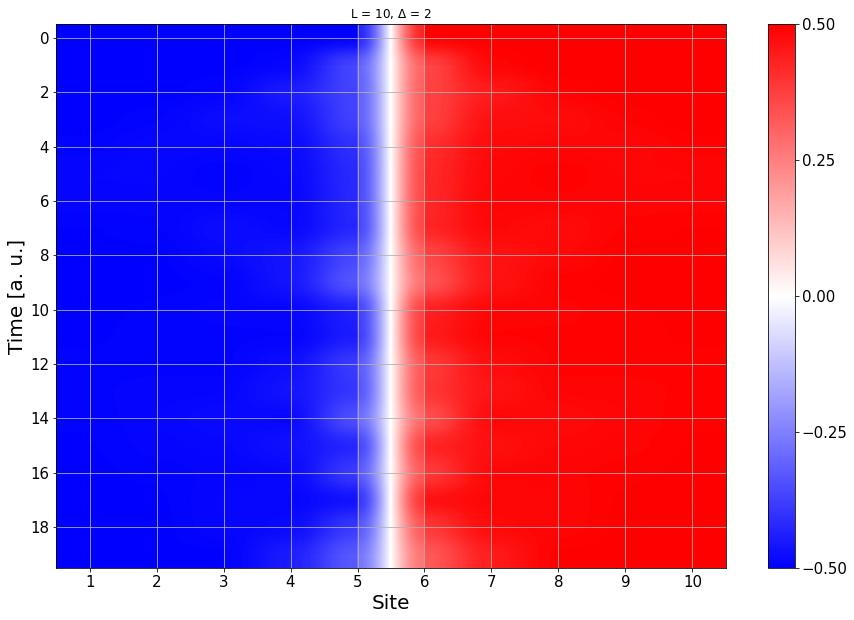

In [14]:
plt.rcParams["figure.figsize"]=15,10
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams['axes.labelsize']=20
plt.rcParams['figure.titlesize']=30
fig = plt.imshow(spinsPlot,interpolation='hamming', cmap=cm.bwr, aspect='auto')

plt.grid(None)
plt.xticks(range(0,L), labels=range(1,L+1))
plt.yticks(range(0,19,2), labels=range(0,19,2))
plt.colorbar(ticks=[-0.5, -0.25, 0, 0.25, 0.5])
plt.xlabel('Site')
plt.ylabel('Time [a. u.]')
plt.title(f"L = {L}, $\Delta$ = {delta}")

plt.show()